In [142]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [162]:
churn = pd.read_csv('churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [144]:
churn = churn.drop(columns='RowNumber')

In [145]:
#churn.style.bar(subset=['Balance', 'CreditScore', 'EstimatedSalary'], color="#d65f5f")

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [146]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [165]:
#sns.pairplot(churn)

## *<center>9.1 Соотношение ушедших и лояльных клиентов.</center>*

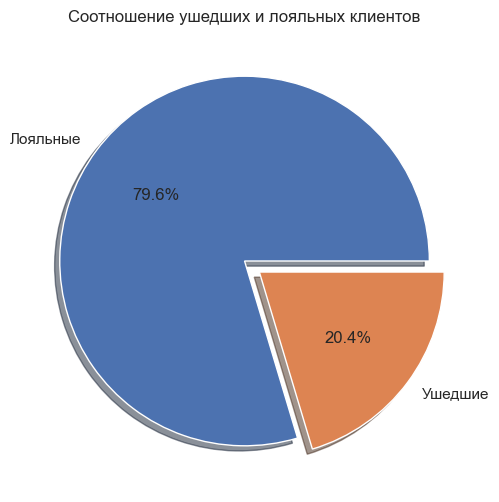

In [148]:
churn['Exited'].value_counts().plot.pie(
    figsize=(6, 6),
    labels=['Лояльные', 'Ушедшие'],
    autopct='%1.1f%%',
    ylabel='',
    shadow=True,
    explode=(0, 0.1),
    title='Соотношение ушедших и лояльных клиентов'
);


### Мы видим, что Лояльные клиенты составляют - 80% от общего числа клиентов, а Ушедшие - 20%

## *<center>9.2 График, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.</center>*

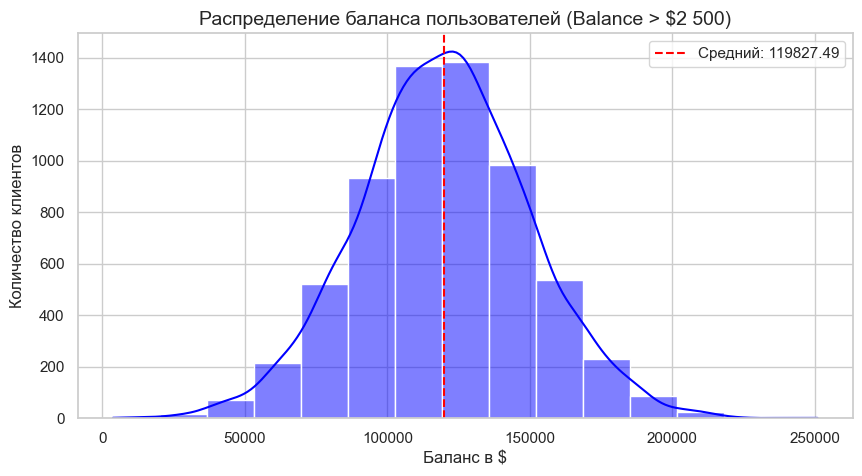

In [149]:
balance_churn = churn[churn['Balance'] > 2500]

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 5))

sns.histplot(data=balance_churn, x='Balance', bins=15, kde=True, color='blue')

plt.title('Распределение баланса пользователей (Balance > $2 500)', fontsize=14)
plt.xlabel('Баланс в $', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)

# Добавим линию среднего значения
plt.axvline(balance_churn['Balance'].mean(), color='red', linestyle='--', label=f'Средний: {balance_churn['Balance'].mean():.2f}')
plt.legend()

plt.show()

### Большая часть клиентов имеет баланс от 80000 до 150000 доларов на счете. Распределение баланса клиентов на счете которых более 2500$ имеет нормальное распределение.

## *<center>9.3 Распределение баланса клиента в разрезе признака оттока.*

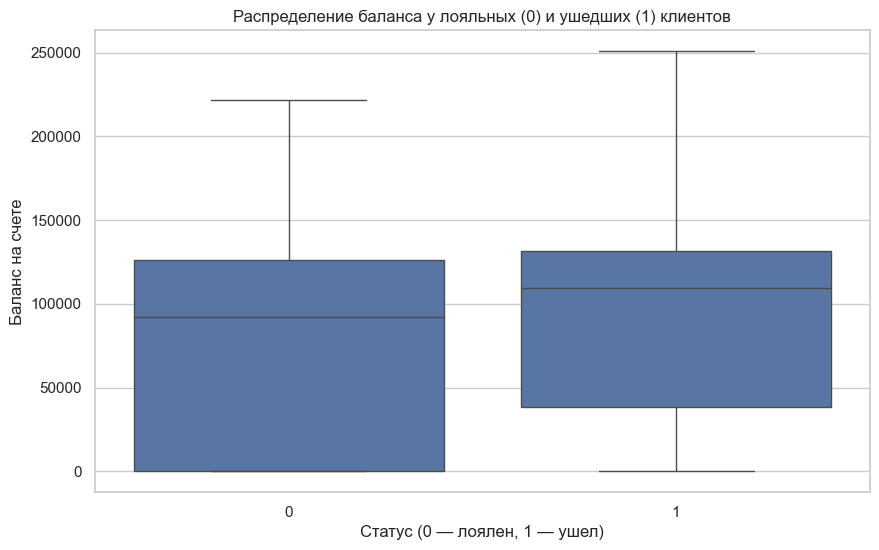

In [150]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn, x='Exited', y='Balance')
plt.title('Распределение баланса у лояльных (0) и ушедших (1) клиентов')
plt.xlabel('Статус (0 — лоялен, 1 — ушел)')
plt.ylabel('Баланс на счете')
plt.show()

### Среди лояльных много клиентов с нулевым или околонулевым балансом на счёте, а так же у них ниже среднее значение баланса, чем у ушедших клиентов. У тех, кто закрыл счета, на балансе чаще находилось от 100 000 до 120 000 долларов. Возможно у банка стали невыгодные условия по депозиту или повышение ставки по кредиту в отличие от других банков.

## *<center>9.4 Распределение возраста в разрезе признака оттока.</center>*

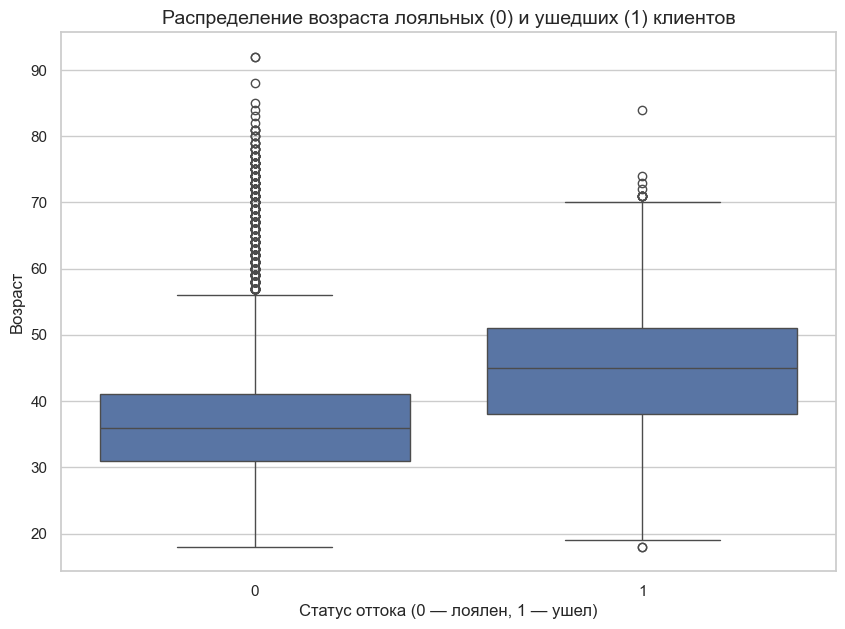

In [151]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=churn, x='Exited', y='Age')
plt.title('Распределение возраста лояльных (0) и ушедших (1) клиентов', fontsize=14)
plt.xlabel('Статус оттока (0 — лоялен, 1 — ушел)')
plt.ylabel('Возраст')
plt.show()

### В группе лояльных клиентов выбросов больше. Банку стоит обратить внимание на группу клиентов в возрасте от 40 до 50 лет.

##  *<center>9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.</center>*

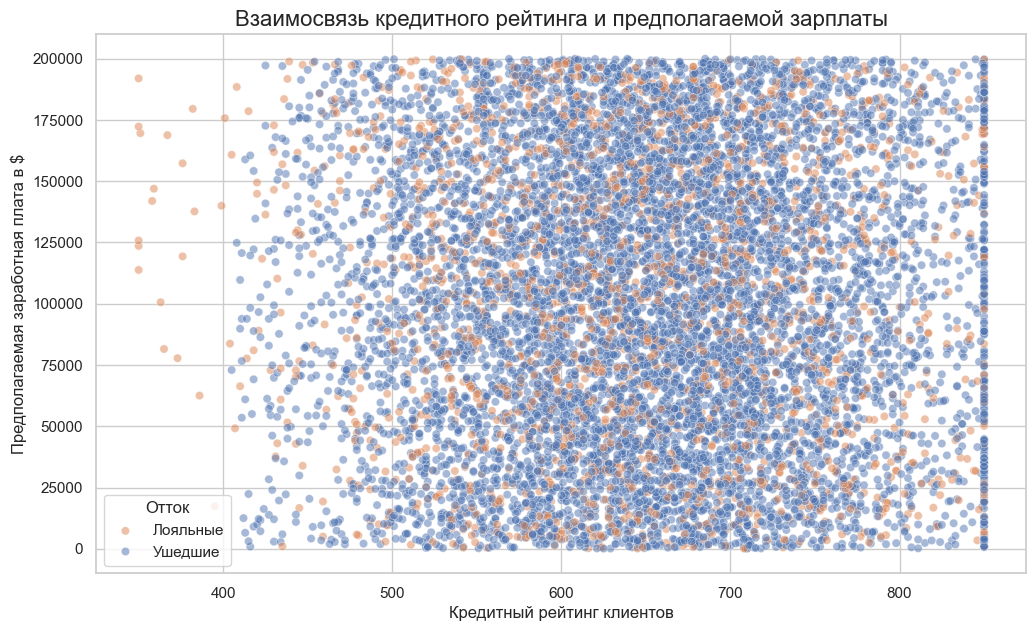

In [ ]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=churn, 
    x='CreditScore', 
    y='EstimatedSalary', 
    hue='Exited', # Расцветка по признаку оттока
    alpha=0.5     # Добавляем розрачность, чтобы видеть плотность точек
)

plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты', fontsize=16)
plt.xlabel('Кредитный рейтинг клиентов')
plt.ylabel('Предполагаемая заработная плата в $')
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])
plt.show()

### Выраженной взаимосвязи не наблюдается

## *<center>9.6 Процент ушедших клиентов по половому признаку</center>*

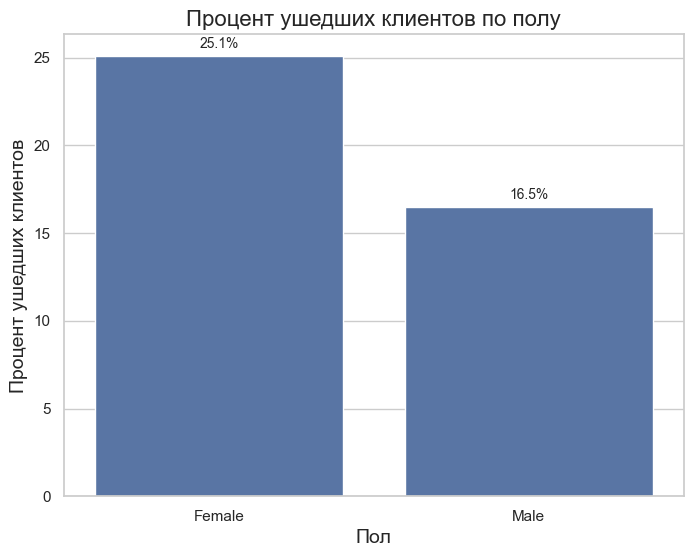

In [153]:
gender_churn = churn.groupby('Gender')['Exited'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_churn.index, y=gender_churn.values)

plt.title('Процент ушедших клиентов по полу', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Процент ушедших клиентов', fontsize=14)

# Добавляем подписи значений
for i, val in enumerate(gender_churn.values):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=10)

plt.show()

### По графику видно, что процент ушедших клиентов - женщин больше примерно на 8%, чем клиентов мужчин.

## *<center>9.7 Как отток клиентов зависит от числа приобретённых у банка услуг.</center>*

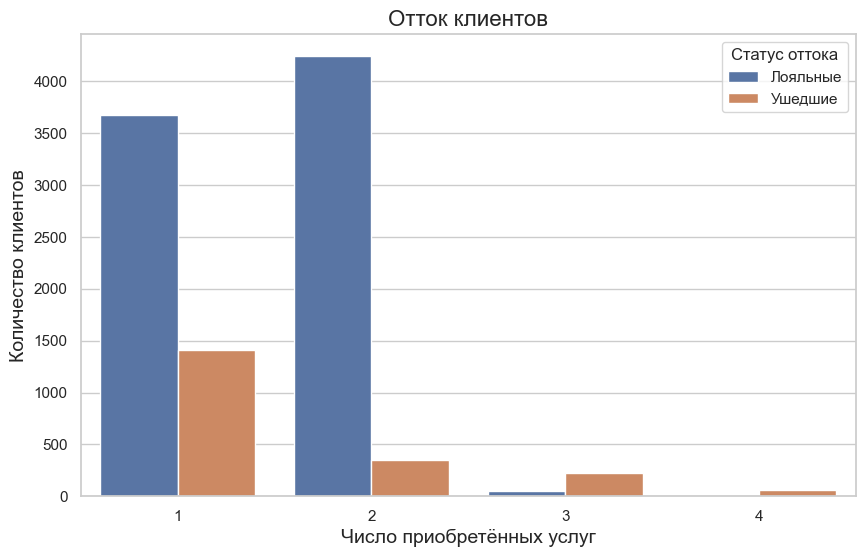

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn, x='NumOfProducts', hue="Exited")
plt.title('Отток клиентов', fontsize=16)
plt.xlabel('Число приобретённых услуг', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=14)
plt.legend(title='Статус оттока', labels=['Лояльные', 'Ушедшие'])

plt.show()

### Все клиенты, у которых 4 продукта, ушли из банка. Клиенты, купившие 3 продукта, гораздо чаще уходят из банка. В то время как лояльные клиенты в основном пользуятся двумя, реже одной, услунами банка.

## *<center>9.8 Как влияет наличие статуса активного клиента на отток клиентов.</center>*

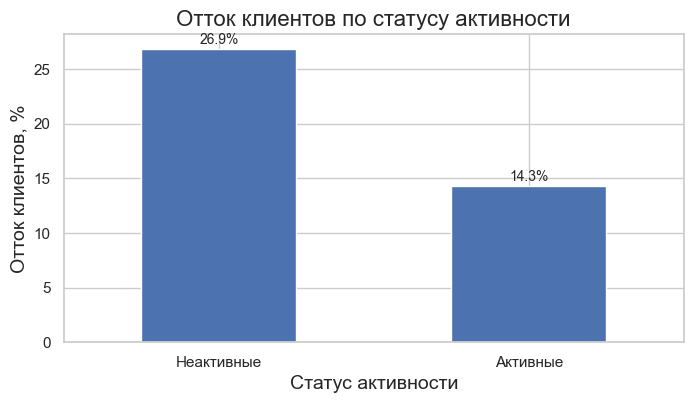

In [155]:
active_churn = churn.groupby("IsActiveMember")['Exited'].mean() * 100

plt.figure(figsize=(8, 4))
active_churn.plot(kind='bar')
plt.title('Отток клиентов по статусу активности', fontsize=16)
plt.xlabel('Статус активности', fontsize=14)
plt.ylabel('Отток клиентов, %', fontsize=14)
plt.xticks([0, 1], ['Неактивные', 'Активные'], rotation=0)

# Добавляем подписи значений
for i, val in enumerate(active_churn.values):
    plt.text(i, val + 0.5, f'{val:.1f}%', ha='center', fontsize=10)

plt.show()

### Предложить клиентам дополнительные бонусы за активность. Ввести снижение % на кредиты или увеличение % ставок для вкладов, для активных клиентов(чем больше вы совершаете покупок, тем больше снижение/увеличение).

## *<center>9.9 В какой стране доля ушедших клиентов больше.</center>*

In [156]:
geography_churn = churn.groupby('Geography')['Exited'].mean().reset_index() * 100

fig = px.choropleth(
    data_frame=geography_churn,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    title='Доля ушедших клиентов по странам (%)',
    range_color=[0, 40],
    color_continuous_scale='Reds',
    labels={'Exited': 'Отток (%)'}
)

fig.show()

/var/folders/7_/5rk0_4z91mj6nfr49n2ppcdc0000gn/T/ipykernel_57800/1081121067.py:6: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



### Доля ушедших клиентов больше в Германии. Возможно это связано с немецкой педантичностью к мелочам, они ишут даже небольшую разницу в цене. Так же и к качеству обслуживания. Мы не знаем в каких годах были сделаны данные, но можно предположить, что в 2019 году клиенты стали больше уходить. Реструктуризация Deutsche Bank: Один из крупнейших немецких банков объявил о масштабной реструктуризации и сокращении 18 000 сотрудников, что сильно повлияло на имидж сектора и вызвало беспокойство. Развитие финтеха и цифровизация: Рост онлайн-банков и платежных систем предлагал удобные альтернативы традиционным банкам, привлекая клиентов. Политика Европейского центрального банка держала ставки на низком уровне, что снижало доходы банков и делало сбережения менее привлекательными.


## *<center>9.10 Категории кредитного рейтинга.</center>*

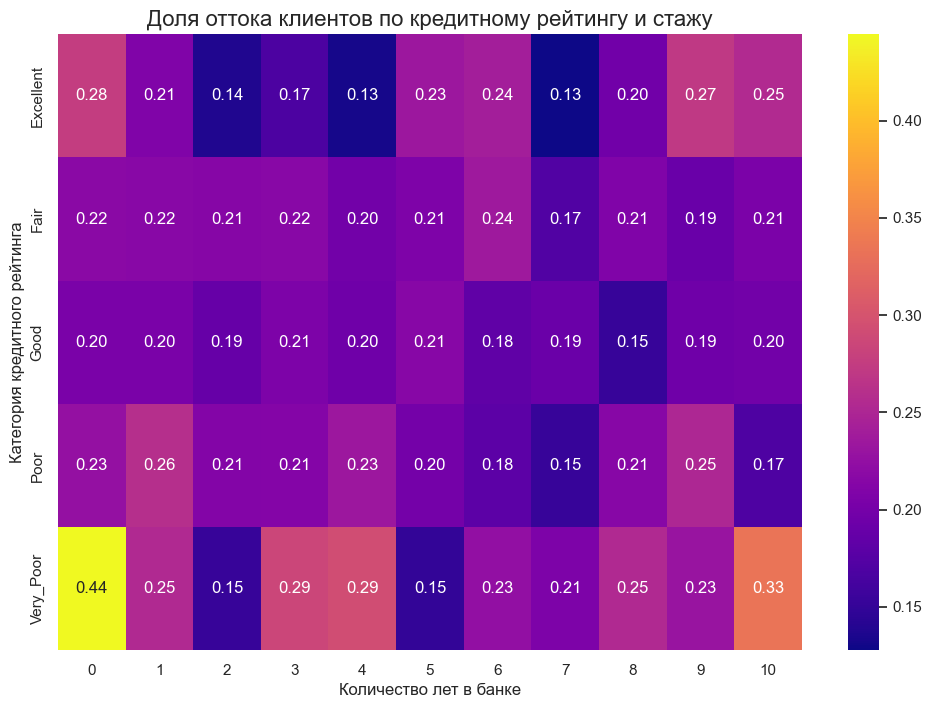

In [164]:
# Функциея get_credit_score_cat(), для создания нового признака CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

pivot = churn.pivot_table(
    values='Exited', 
    index='CreditScoreCat', 
    columns='Tenure', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='plasma')

plt.title('Доля оттока клиентов по кредитному рейтингу и стажу', fontsize=16)
plt.xlabel('Количество лет в банке')
plt.ylabel('Категория кредитного рейтинга')
plt.show()

### Чаще всего уходят клиенты из категории Very_Poor. Они не задерживаются в банке, особенно в первый год и спустя десятилетие обслуживания.

